## NLP CLASSIFICATION - SENTIMENT ANALYSIS

Las Vegas,Sezar Palas'ta bulunan Bacchanal Büfe'nin restorant yorumlarını ve hangi yoruma kaç yıldız verilmiş bunları inceleyeceğiz.Gerekli paketleri yükleyip NLP projesinde yapılması gerekenleri yapacağız.Yapılan yorumları pozitif,negatif ve nötr olarak ayıracağız.Bunları bir wordclouda dönüştüreceğiz.Modelimiz eğitmek için hazır hale geldikten sonra test ve eğitim kısımlarından geçirip başarı oranlarımızı inceleyeceğiz.Restorantta neler eksikmiş bunları bulup,yorumlayacağız.

Bir NLP projesine başlarken dikkat etmek gerekenler
* 1-Her şeyi küçük harfe çevir
* 2-Noktalama işaretlerini kaldır
* 3-Rakamları kaldır
* 4-Satır sonlarını kaldır \n
* 5-Stopwords dediğimiz gereksiz kelimeleri çıkart
* 6-Tokenize et(liste haline getirip aralarına virgül koyarak ayır vb.)
* 7-Lemma ve stemma ile ekleri kaldır ve kökleri bul
* 8-Vektorize et

<img src='lv.jpg' width=500>

<img src='bufe.jpg' width=800>

### Gerekli Paketleri Tanımlama

In [40]:
#!pip install nltk

In [41]:
#pip install --upgrade nltk

In [42]:
import nltk
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns

### Dosyamızı okuyoruz.

In [152]:
df=pd.read_csv('restaurant.csv')

### EDA - Exploratory Data Analysis- Keşifçi Veri Analizi

In [44]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [46]:
df.shape

(10417, 10)

In [47]:
df.isnull().sum()

,0
Unnamed: 0,0
review_id,0
user_id,0
business_id,0
stars,0
useful,0
funny,0
cool,0
text,0
date,0


In [153]:
df=df[['stars','text']]
#Gerekli olan sütunları seçiyoruz.

In [49]:
df.head()

,stars,text
0,5,After getting food poisoning at the Palms hote...
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,The crab legs are better than the ones at Wick...
3,1,Not worth it! Too salty food and expensive! Th...
4,5,I would give this infinite stars if I could. M...


In [50]:
df['text'][0]

"After getting food poisoning at the Palms hotel, I was scared to eat at any more buffets. But we figured with the high price tag, the positive reviews etc, it was worth a chance. I'm really glad we gave it a try. (btw I uploaded a collage of the things we ate)\n\nThe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. Totally worth it though.\n\nThe prime rib was the best Ive ever had.\n\nI loved the sweet potato tots.\n\nI even have PHO!\n\nThe music was great and so was our server Alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\nI will return next trip in more comfortable shoes. After a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. Thank you for an exquisite dinner."

In [154]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace("[^\w\s]" , "",regex=True)
df['text']=df['text'].str.replace('[\n]', '',regex=True)
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\r',' ')
#Noktalama ve diğer işaretleri kaldırıyoruz.

In [52]:
df['text'][0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [53]:
df['stars'].value_counts()

,count
stars,
5,4247
4,2636
3,1561
1,1056
2,917


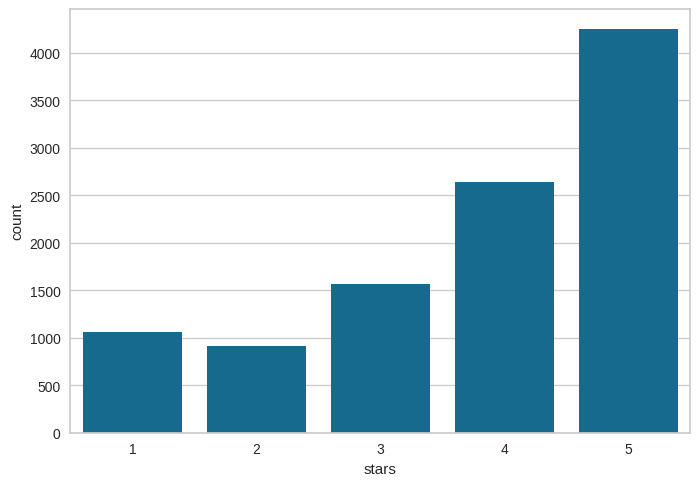

In [54]:
sns.countplot(x=df['stars']);

In [55]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [57]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [58]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### İngilizce Olmayan Dilleri Ayırma

In [151]:
#pip install langdetect

In [155]:
from langdetect import detect

In [156]:
df['lang']=df['text'].apply(lambda x: detect(x))

In [62]:
df['lang'].value_counts()

,count
lang,
en,10375
es,10
zh-cn,7
ja,7
ko,6
de,4
fr,4
da,2
pt,1


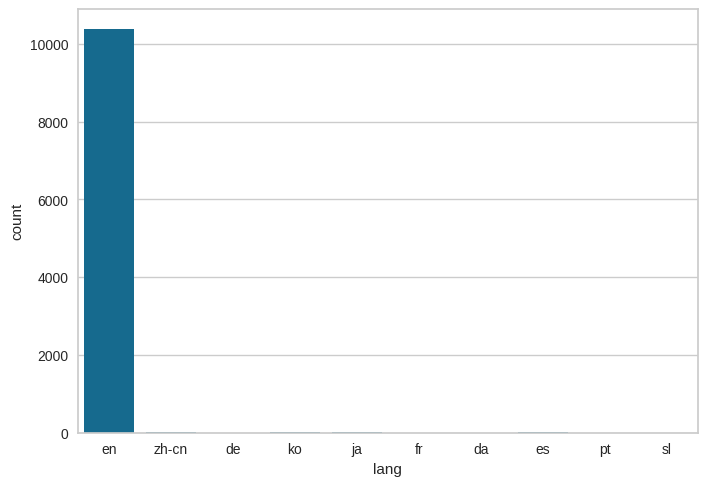

In [63]:
sns.countplot(x=df['lang']);

In [64]:
detect(df['text'][5])

'en'

In [65]:
df[df['lang'] == 'zh-cn']

,stars,text,lang
195,1,真心不怎么样 中午没有雪蟹腿菜都很一般港式点心说的过去其他的中式菜只能说尚且入口寿司品质还行...,zh-cn
1370,3,没有做好功课千辛万苦找到才发现ces期间的晚餐要近刀都想打退堂鼓了其实拉斯维加斯的自助餐都并...,zh-cn
3628,5,凯撒宫的自助餐怎么可以这么棒帝王蟹生蚝虾蟹鲜美无比羊排叉烧披萨提拉米苏布丁每一样都想说umm...,zh-cn
9151,3,其实还好没有评价说的那么好 毕竟他只是一家buffet 餐厅首先值得点赞的是他的品种很多你可...,zh-cn
9254,1,食物还可以但吃饭要排很久的队而且歧视中国人吃饭还要出示护照不是很好找在凯撒一楼赌场的里面牛排...,zh-cn
10127,4,很多种类的选择有海鲜甜点和各国的美食就是现在价格变贵了周日美元一位价格还是不便宜的味道还是不...,zh-cn
10366,1,看了网上的广告去的非常失望菜色没有那么丰富大部分菜品颜色暗沉给人感觉不新鲜最想吃的蟹腿肉质又...,zh-cn


In [66]:
df[df['lang'] == 'de']

,stars,text,lang
464,5,die auswahl ist gigantisch es gibt verschieden...,de
2705,5,das beste buffet in las vegas und ich habe al...,de
4933,5,buffetrestaurants haben fast alle hotels in la...,de
5809,3,super auswahl mega groß schönes ambieteaber de...,de


In [67]:
df[df['lang'] == 'ko']

,stars,text,lang
864,3,談到位於賭城的自助餐十個朋友內大概會有七個或更多的朋友推薦這間位於 凱薩宮賭場 caesar...,ko
1962,2,食物真的很差要排隊三個小時以他的聲譽來說每位元的價錢不算貴不過進到去真是大吃一驚食物真的很差...,ko
2185,2,完全無法理解這間被推薦的原因到底為何相當 相當 相當 普通的一間把費只有西式料理的質 還算可...,ko
4113,1,慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢慢啊啊ーー i...,ko
4842,4,空間明亮 prime rib很好吃 甜點種類很多 也都好吃但是中式方面種類比較少但是我不介意...,ko
10284,4,這是我第一次到這個餐廳吃飯因為它在yelp的評分很高所以我想去試試果然是一家好餐廳雖然菜色不...,ko


In [157]:
df = df[df['lang'] == 'en']
#İngilizce olmayan yorumları çıkarıyoruz.

In [69]:
df['lang'].unique()

array(['en'], dtype=object)

In [70]:
df.head()

,stars,text,lang
0,5,after getting food poisoning at the palms hote...,en
1,4,a feast worthy of godsbaccarnal buffet in caes...,en
2,4,the crab legs are better than the ones at wick...,en
3,1,not worth it too salty food and expensive this...,en
4,5,i would give this infinite stars if i could my...,en


### TF/ IDF

In [158]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [159]:
vect=CountVectorizer()

In [160]:
tf=pd.DataFrame(vect.fit_transform(df['text']).toarray(),columns=vect.get_feature_names_out())

In [161]:
tf1=vect.fit_transform(df['text']).toarray().sum(axis=0)

### Sentiment Analizi

In [162]:
df.loc[(df['stars']==1)|(df['stars']==2),'sentiment']='negative'
df.loc[(df['stars']==3,'sentiment')]='neutral'
df.loc[(df['stars']==4)|(df['stars']==5),'sentiment']='positive'
#Yorum yapanlarda 1 ve 2 yıldız verenleri negatif,3 yıldızı nötr,4 ve 5 yıldızı pozitif olarak alıyoruz.

In [76]:
df.head()

,stars,text,lang,sentiment
0,5,after getting food poisoning at the palms hote...,en,positive
1,4,a feast worthy of godsbaccarnal buffet in caes...,en,positive
2,4,the crab legs are better than the ones at wick...,en,positive
3,1,not worth it too salty food and expensive this...,en,negative
4,5,i would give this infinite stars if i could my...,en,positive


In [77]:
df['sentiment'].value_counts()

,count
sentiment,
positive,6854
negative,1964
neutral,1557


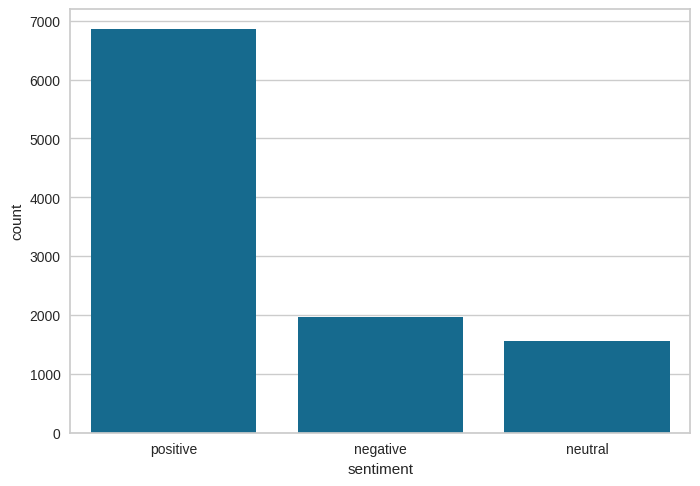

In [78]:
sns.countplot(x=df['sentiment']);

### Polarity ve Subjectivity Hesaplama

In [100]:
from textblob import TextBlob

In [101]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity']= df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [102]:
df['polarity']

,polarity
0,0.337330
1,0.219409
2,-0.134722
3,-0.325000
4,0.362500
...,...
10412,0.543750
10413,0.210101
10414,0.480000
10415,0.185185


In [103]:
df['subjectivity']

,subjectivity
0,0.586926
1,0.537292
2,0.731944
3,0.400000
4,0.725000
...,...
10412,0.481250
10413,0.586869
10414,0.630000
10415,0.533333


In [104]:
df.head()

,stars,text,lang,sentiment,polarity,subjectivity
0,5,after getting food poisoning at the palms hote...,en,positive,0.337330,0.586926
1,4,a feast worthy of godsbaccarnal buffet in caes...,en,positive,0.219409,0.537292
2,4,the crab legs are better than the ones at wick...,en,positive,-0.134722,0.731944
3,1,not worth it too salty food and expensive this...,en,negative,-0.325000,0.400000
4,5,i would give this infinite stars if i could my...,en,positive,0.362500,0.725000


### Stop Wordsleri Kaldırma ve Vektörize Etme

In [163]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [164]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [165]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [166]:
new_data=df

In [167]:
new_data.to_csv('new_data.csv')

### Word Cloud Oluşturma

In [168]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [169]:
import matplotlib.pyplot as plt

In [170]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('like.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [171]:
like=df[df['stars']==5]['text']

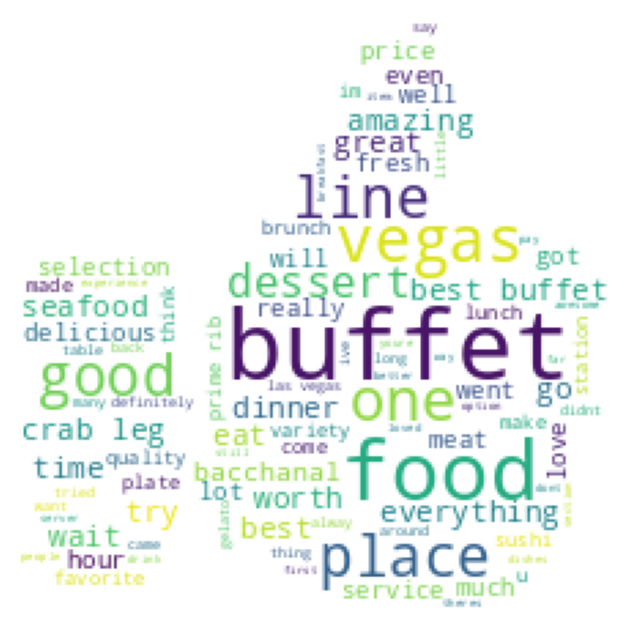

In [172]:
wc(like,'white')
#5 yıldız verenlerin wordcloudu

In [ ]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('d.jpg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [ ]:
dislike=df[df['stars']==1]['text']

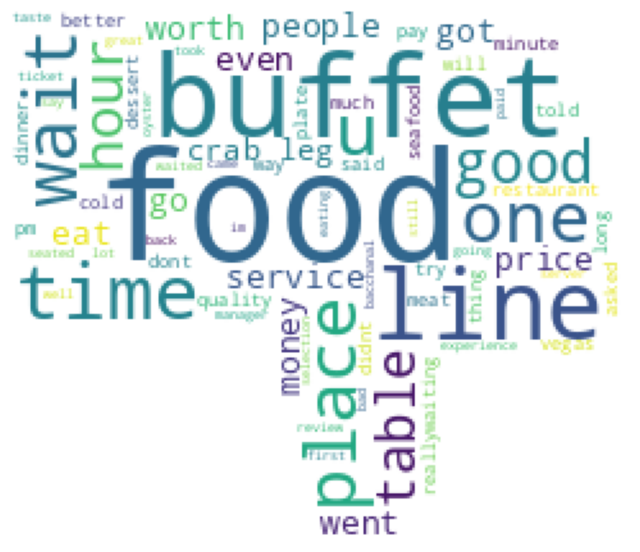

In [ ]:
wc(dislike,'white')
#1 yıldız verenlerin wordcloudu

In [ ]:
pozitif=df[df['sentiment']=='positive']['text']
negatif=df[df['sentiment']=='negative']['text']
nötr=df[df['sentiment']=='neutral']['text']

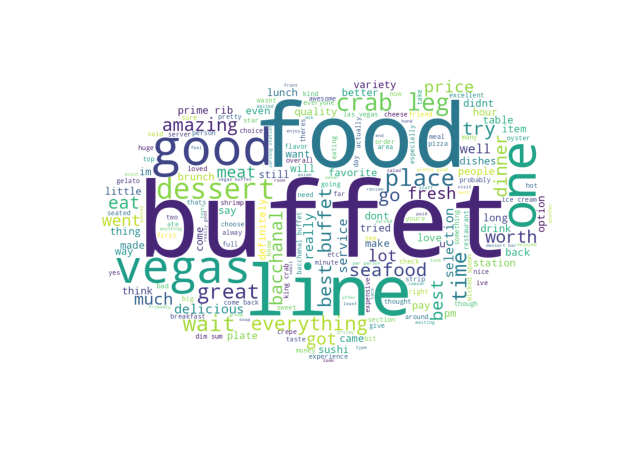

In [ ]:
def wc(data):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color = 'white',stopwords=STOPWORDS, mask = mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")


wc(pozitif)
#Pozitif yorum yapanların wordcloudu

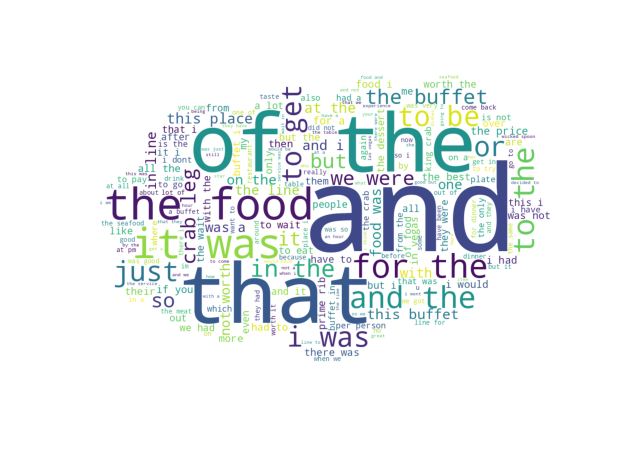

In [ ]:
def wc(data):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color = 'white',stopwords='STOPWORDS', mask = mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")


wc(negatif)
#Negatif yorum yapanların wordcloudu

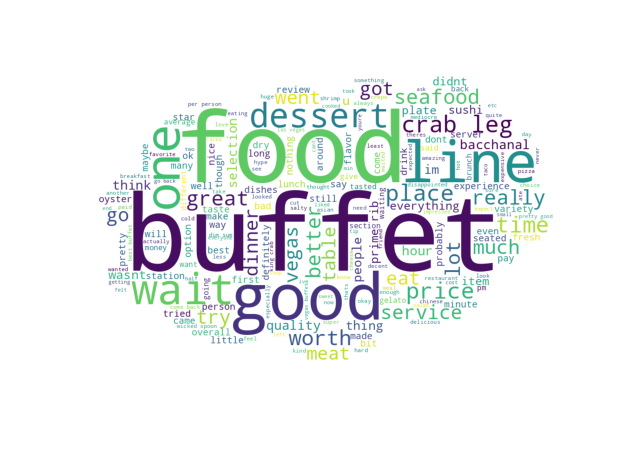

In [ ]:
def wc(data):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color = 'white',stopwords=STOPWORDS, mask = mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")


wc(nötr)
#Nötr yorum yapanlar

In [173]:
pozitif.sample(7)

,text
1338,i visited vegas recently went to different bu...
6983,this is an updated review in light of my holid...
2675,we went at pm on a saturday and the wait wasnt...
6083,great upscale buffet one of the more nicer on...
2282,we arrived at pm on a wednesday and were expec...
7598,when i die if i get to heaven this will be my ...
1612,you will pay around for this buffet but money...


In [174]:
pozitif[8761]

'omg so good so freaking good well worth the hour long wait for a monday lunch seriously the moment i was in i had no idea where to go first so much good food fresh shrimp prime rib sushi italian chinese mexican everything i dont think i have ever eaten so much food at one time i really recommend wearing stretchy pants youll be so stuff that youll really appreciate more belly space pmy favorite part of the buffet was by far the dessert station there were loads of ice creams tiramisu strawberry shortcake multiple kinds of creme brulee and even a crepemaking station ah it was foodie heaven i cannot wait to go back the next time im in vegas'

In [175]:
negatif.sample(7)

,text
5149,went to the buffet as a work lunch food was co...
3058,dont come to here during the holidays the regu...
4349,the food may be great but the service is the a...
2309,overrated and underwhelming we got one of our...
7887,las vegas has many different buffets and i was...
4898,i have no idea why this is a star buffet its ...
5637,we were there at nd of dec after reception bro...


In [176]:
negatif[458]

'place is severely overrated and over priced in my opinion  the menu seems nice at a glance eg chicken and waffles crab legs carved meats italian asian but very poorly executed  the food was not fresh at all and many of the dishes i tried were overcooked  the staff also left much to be desired  i found them to completely unattentive and disengaged  we literally had to clear our own table placed our finished plates at a nearby hutch and was not able to get assistance unless we got up from our table and walked up to someone and asked for it  take your  and spend it somewhere else wicked spoon bellagio anywhere'

In [177]:
nötr.sample(7)

,text
4638,i really dont understand the hype maybe i cam...
10225,when this buffet reopened under its current it...
9041,after days in vegas filled with hours of rese...
3267,ehhhhh i was super hyped to come dine at one o...
8958,pretty good as far as buffets go but a bit dis...
2701,i was pleasantly surprised at the selection of...
3806,we came on sunday where you pay brunch pricing...


In [178]:
nötr[8072]

'this is my fourth time eating here and once again i was not blown away or impressed with anything here my friends and i came for dinner a few nights ago and while the ambience was nice and the dining room was pretty the food left a lot to be desiredthe pasta dishes including the macaroni and cheese were undercooked and hard there wasnt much flavor either the pizza was also very disappointing and tasted cheap like the chuck e cheese type stuff you get at theme parks the gelato which tasted more like bland ice cream wasnt impressive either this is one of the most expensive buffets in vegas and you expect it to have very good quality that was not the case and i suggest you save a few dollars and go to the bellagio buffet instead which has better tasting foodi keep hoping that each time i come to bacchanal i will have a better experience but honestly that just has never been the case i only give three stars because there is a huge selection with many options but i value quality over quant

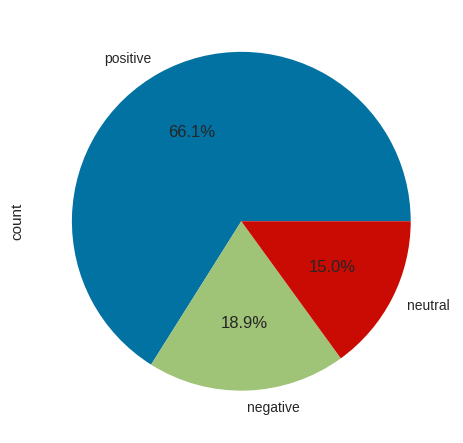

In [ ]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%');

In [116]:
x=df['text']
y=df['sentiment']

In [118]:
x=vect.fit_transform(x)

### Modelleme

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [119]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=.20)

### Logistic Regression

In [120]:
l=LogisticRegression()
model=l.fit(x_train,y_train)

In [121]:
import pickle

In [122]:
pickle.dump(model,open('nlp.pkl','wb'))
#modelimizi kaydediyoruz

In [123]:
lpred=l.predict(x_test)
accuracy_score(lpred,y_test)

0.8009638554216868

In [124]:
print(classification_report(lpred, y_test))

              precision    recall  f1-score   support

    negative       0.71      0.71      0.71       418
     neutral       0.37      0.47      0.41       249
    positive       0.93      0.89      0.91      1408

    accuracy                           0.80      2075
   macro avg       0.67      0.69      0.68      2075
weighted avg       0.82      0.80      0.81      2075



In [125]:
confusion_matrix(lpred, y_test)

array([[ 295,   87,   36],
       [  77,  118,   54],
       [  43,  116, 1249]])

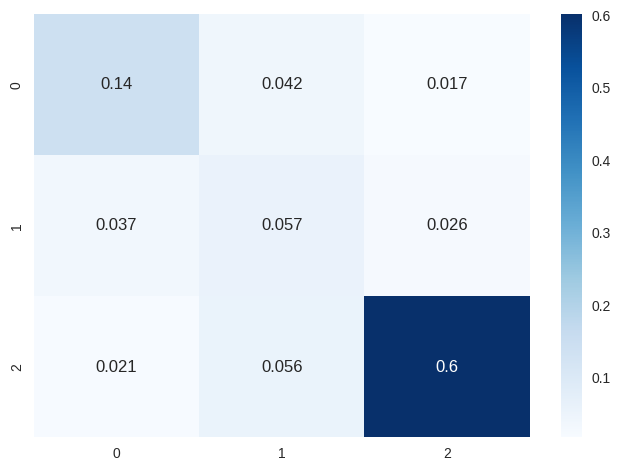

In [126]:
cm = confusion_matrix(lpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues');
#Normalize edilmiş hali

In [132]:
#K-Fold Cross Validation
x=df['text']
y=df['sentiment']
x=vect.fit_transform(x)

model=LogisticRegression()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.80048193 0.79180723 0.81060241 0.80337349 0.80144578]
Mean Accuracy: 0.8015421686746986


In [ ]:
#ROC / AUC, klasik olarak binary classification için geliştirilmiştir.

#Multiclass bir problemde (örn. sentiment: negative, neutral, positive) doğrudan kullanamayız.Bu yüzden burada auc ve roc yok.

### Multinomial NB

In [136]:
nb=MultinomialNB()
model=nb.fit(x_train,y_train)
nbpred=model.predict(x_test)
accuracy_score(nbpred,y_test)

0.7826506024096386

In [137]:
print(classification_report(nbpred, y_test))

              precision    recall  f1-score   support

    negative       0.65      0.67      0.66       406
     neutral       0.45      0.47      0.46       306
    positive       0.90      0.89      0.90      1363

    accuracy                           0.78      2075
   macro avg       0.67      0.67      0.67      2075
weighted avg       0.79      0.78      0.78      2075



In [138]:
confusion_matrix(nbpred, y_test)

array([[ 271,   71,   64],
       [  98,  143,   65],
       [  46,  107, 1210]])

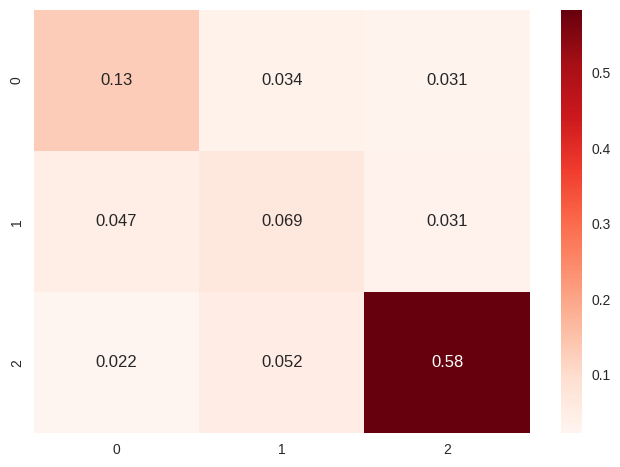

In [139]:
cm = confusion_matrix(nbpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Reds');
#Normalize edilmiş hali

In [140]:
#K-Fold Cross Validation
x=df['text']
y=df['sentiment']
x=vect.fit_transform(x)

model=MultinomialNB()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.7826506  0.78409639 0.79614458 0.80240964 0.78072289]
Mean Accuracy: 0.7892048192771084


In [141]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):

    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    nb = MultinomialNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,  b, nb, knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB','MultinomialNB','K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []


    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)

    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1


    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [142]:
algo_test(x,y)

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.798554,0.787734,0.798554,0.792493
MLP Classifier,0.785060,0.767460,0.785060,0.774695
MultinomialNB,0.782651,0.778656,0.782651,0.780551
SVM,0.767711,0.745253,0.767711,0.723974
Gradient Boosting,0.761928,0.732272,0.761928,0.724272
AdaBoost,0.760482,0.726810,0.760482,0.731920
Random Forest,0.701205,0.673494,0.701205,0.612408
BernoulliNB,0.674699,0.685650,0.674699,0.673640
K-Nearest Neighbors,0.667952,0.613115,0.667952,0.618755
Decision Tree,0.661687,0.645749,0.661687,0.652655


### Pycaret ile AutoML

In [143]:
#!pip install pycaret

In [144]:
import pandas as pd

In [145]:
df2=pd.read_csv('new_data.csv')

In [146]:
df2.head()

,Unnamed: 0,stars,text,lang,sentiment,polarity,subjectivity
0,0,5,after getting food poisoning at the palms hote...,en,positive,0.337330,0.586926
1,1,4,a feast worthy of godsbaccarnal buffet in caes...,en,positive,0.219409,0.537292
2,2,4,the crab legs are better than the ones at wick...,en,positive,-0.134722,0.731944
3,3,1,not worth it too salty food and expensive this...,en,negative,-0.325000,0.400000
4,4,5,i would give this infinite stars if i could my...,en,positive,0.362500,0.725000


In [147]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [148]:
from pycaret.classification import*

In [149]:
a=setup(data=df2,target="sentiment")

,Description,Value
0,Session id,2824
1,Target,sentiment
2,Target type,Multiclass
3,Target mapping,"negative: 0, neutral: 1, positive: 2"
4,Original data shape,"(10375, 6)"
5,Transformed data shape,"(10375, 6)"
6,Transformed train set shape,"(7262, 6)"
7,Transformed test set shape,"(3113, 6)"
8,Numeric features,3
9,Categorical features,2


In [150]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1560
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2160
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2960
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2900
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.2460
et,Extra Trees Classifier,0.8162,1.0000,0.8162,0.7847,0.7634,0.6413,0.6876,0.3460
dt,Decision Tree Classifier,0.8109,0.8888,0.8109,0.7648,0.7532,0.6312,0.6797,0.1750
nb,Naive Bayes,0.7809,0.6773,0.7809,0.6561,0.6880,0.4369,0.5108,0.1620
rf,Random Forest Classifier,0.7036,0.9996,0.7036,0.8188,0.6462,0.5358,0.6138,0.4290
ada,Ada Boost Classifier,0.6791,0.0000,0.6791,0.7561,0.6110,0.5051,0.5493,0.5200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Özet

Bu projemizde Las Vegas'da bulunan bir büfenin yorumlarını inceledik.İlk başta dosyamızı okuduk,gerekli sütunları alıp düzenlemeler yaptık.Yorumları pozitif,negatif ve nötr olmak üzere 3 kısma ayırdık.Dosyamız modele hazır hale geldi.Tahminlerimizi yaptık.Logistic regression ve multinomial nb modellerinin confusion matrix,k fold cross validation ile çıkan başarı oranlarını inceledik.İkiden fazla cevabımız olduğu için auc ve roc curve kullanmadık.Pycaret ile automl yaptığımızda bazı modellerde overfitting yaptığını gördük.Bunun sebepleri tfidf,count vectorization gibi işlemler yaptığımız için olabilir.

Yapılan negatif yorumlardan yaptığım çıkarımlara göre çok uzun bir bekleme sırası varmış.Kapanış saatinden saatler önce gelenler olmuş ama yine son dakikaya kalmışlar.Yedikleri yemekleri çoğu beğenmemiş.Hatta lokmalarını geri tükürenler olmuş.Garsonlar kaba ve anlayışsızmış.Bütün bunların yanında pahalı bir menüsü varmış.Bu konularda büyük geliştirmelere ihtiyaçları olduğunu düşünüyorum.